<a href="https://colab.research.google.com/github/gautamprafful007/Deep-Learning-using-PyTorch/blob/main/02_PyTorch_Classification_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with PyTorch
Classification is a problem of predicting whether something is one thing or another(there can be multiple things as the options).


## Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples=1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)


In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X :\n {X[:5]}")
print(f"First 5 samples of y :\n {y[:5]}")

First 5 samples of X :
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y :
 [1 1 1 1 0]


In [5]:
# Make dataframe of circle data
import pandas as pd
circles=pd.DataFrame({"X1" : X[:,0],
                      "X2" : X[:,1],
                      "labels" : y})
circles.head(10)

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


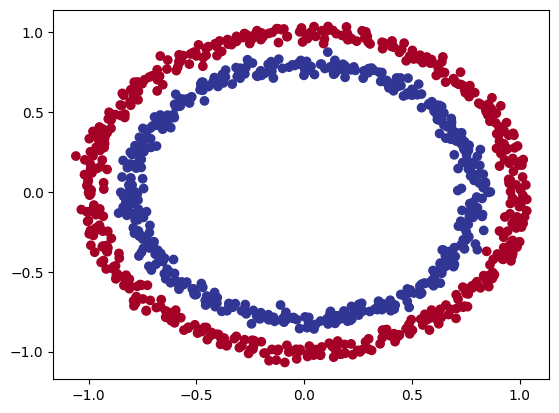

In [6]:
# Visualize, visualize, visualize
from matplotlib import pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note**: The data we are working with is often referred to as a Toy dataset, the dataset which is small enough to experiment but still sizeable enough to practice the fundamentals.

## Check input and optput shapes

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# View the first example of features and labels
X_sample=X[0]
y_sample=y[0]

print(f"Values for one sample of X : {X_sample} and the same for y : {y_sample}")
print(f"Shapes for one sample of X : {X_sample.shape} and the same for y : {y_sample.shape}")

Values for one sample of X : [0.75424625 0.23148074] and the same for y : 1
Shapes for one sample of X : (2,) and the same for y : ()


## Turn data into tensors and create train and test splits

In [10]:
import torch
torch.__version__

'2.8.0+cu126'

In [11]:
type(X) , X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
# Turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [13]:
type(X),type(y),X.dtype,y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [14]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

## Building a Model
Let's build a model to classify our red and blue dots.
To do do we want to:
1. Setup device agnostic code so our code runs on an accelerator(GPU) if there is one
2. Construct a model by subclassing `nn.Module`
3. Define loss function and optimizer
4. Create a training and testing loop

In [16]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [17]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup a device agnostic code, lets create a model that:
1. Subclasses nn.Module (almost all models in PyTorch subclass `nn.module`.
2. Create two `nn.linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines a forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the `target` device

In [18]:
X_train.shape

torch.Size([800, 2])

In [19]:
y_train.shape

torch.Size([800])

In [20]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create nn.Linear Layers capable of handling the shapes of our data
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  # 3. Design a forward method that outlines the forward pass
  def forward(self,x):
    return self.linear_2(self.linear_1(x)) # x --> layer_1 --> layer_2 --> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
device

'cpu'

In [22]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.2760,  0.6535],
         [ 0.1176, -0.1111],
         [-0.1492, -0.4681],
         [-0.4507, -0.1533],
         [-0.3378,  0.1749]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1620, -0.2058,  0.2300, -0.3877, -0.5890], requires_grad=True),
 Parameter containing:
 tensor([[-0.4340, -0.0355,  0.1122,  0.1458,  0.3734]], requires_grad=True),
 Parameter containing:
 tensor([0.2053], requires_grad=True)]

In [23]:
next(model_0.parameters()).device

device(type='cpu')

In [24]:
# Let's replicate our model using nn.Sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

In [25]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0281,  0.0387],
                      [ 0.1467, -0.5905],
                      [ 0.2635, -0.1900],
                      [-0.5728,  0.1866],
                      [-0.5433,  0.5894]])),
             ('0.bias', tensor([-0.5848, -0.6818,  0.2027,  0.4463,  0.1423])),
             ('1.weight',
              tensor([[-0.3952, -0.2707, -0.0311, -0.3070, -0.4381]])),
             ('1.bias', tensor([0.4265]))])

In [27]:
# Make Predictions
with torch.inference_mode():
  untrained_pred=model_0(X_test.to(device))
print(f"Length of Predictions : {len(untrained_pred)} , Shape of Predictions : {untrained_pred.shape}")
print(f"Length of Test samples : {len(X_test)} , Shape of test samples : {X_test.shape}")
print(f"First 10 predictions : \n{torch.round(untrained_pred[:10])}")
print(f"First 10 labels : {y_test[:10]}")

Length of Predictions : 200 , Shape of Predictions : torch.Size([200, 1])
Length of Test samples : 200 , Shape of test samples : torch.Size([200, 2])
First 10 predictions : 
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.]])
First 10 labels : tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [28]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Setup Loss function and Optimizer
Which Loss function or Optimizer should we use ?
 For Regression we can use MAE or MSE (Mean absolute error or mean squared error)
 For classification we can use Binary cross entropy or Categorical cross entropy (cross entropy)

In [29]:
# Setup the loss function
# loss_fn = nn.BCELoss # BCELoss = requires inputs to have gone through the sigmoid activation function prior ro input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function built in

optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)


In [30]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## Train the Model
To train our model we are going to need a training loop with the following steps.
1. Forward pass
2. Calculate the loss
3. Optimizer zero_grad
4. Loss Backwards (backpropagation)
5. Optimizer step (gradient descent)

### Going from raw logits -> prediction probabilities -> prediction labels
Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them through some kind of activation function(e.g. **sigmoid** for binary classification and **softmax** for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [31]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3824],
        [0.4839],
        [0.4234],
        [0.3695],
        [0.9110]])

In [32]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [33]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_prob=torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.5944],
        [0.6187],
        [0.6043],
        [0.5913],
        [0.7132]])

For our prediction probability values, we need to perform range style rounding on them.
* `y_pred_prob` : >=0.5 , `y=1`(class=1)
* `y_pred_prob` : < 0.5 , `y=0`(class=0)

In [34]:
# Find the predicted labels
y_preds = torch.round(y_pred_prob)

# In Full
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [35]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Building a Training and Testing Loop

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs=1000

# Put data to target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) # turns logits -> pred probs -> pred labels

  # 2. Calculate Loss/accuracy
  loss = loss_fn(y_logits,  # Our Loss function expects y_logits values because we are using BCELogitLoss()
                 y_train)   # as a loss function because it's more numerically stable than BCELoss().
  acc = accuracy(y_true=y_train,
                 y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss Backwards (Backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    # 2. Calculate Test loss/accuracy
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happning
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Train Loss : {loss:.5f} | Train Acc : {acc:.2f}% | Test Loss : {test_loss:.5f} | Test Accuracy : {test_acc:.2f}%")

Epoch : 0 | Train Loss : 0.75126 | Train Acc : 50.00% | Test Loss : 0.74396 | Test Accuracy : 50.00%
Epoch : 10 | Train Loss : 0.71791 | Train Acc : 57.63% | Test Loss : 0.71445 | Test Accuracy : 57.50%
Epoch : 20 | Train Loss : 0.70670 | Train Acc : 53.00% | Test Loss : 0.70481 | Test Accuracy : 54.00%
Epoch : 30 | Train Loss : 0.70201 | Train Acc : 51.00% | Test Loss : 0.70100 | Test Accuracy : 56.00%
Epoch : 40 | Train Loss : 0.69951 | Train Acc : 50.00% | Test Loss : 0.69913 | Test Accuracy : 54.00%
Epoch : 50 | Train Loss : 0.69791 | Train Acc : 50.25% | Test Loss : 0.69803 | Test Accuracy : 53.50%
Epoch : 60 | Train Loss : 0.69679 | Train Acc : 50.38% | Test Loss : 0.69731 | Test Accuracy : 52.00%
Epoch : 70 | Train Loss : 0.69595 | Train Acc : 49.88% | Test Loss : 0.69681 | Test Accuracy : 52.50%
Epoch : 80 | Train Loss : 0.69532 | Train Acc : 50.12% | Test Loss : 0.69646 | Test Accuracy : 51.50%
Epoch : 90 | Train Loss : 0.69483 | Train Acc : 50.38% | Test Loss : 0.69621 | Test

## Make predictions and Evaluate the Model
From the metrics it looks like our model isn't learning anything...

So to inspect let's make some predicitons and make them visual!

To do so, we are going to import a function called `plot_decision_boundary()`.

In [37]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exist , skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions , plot_decision_boundary


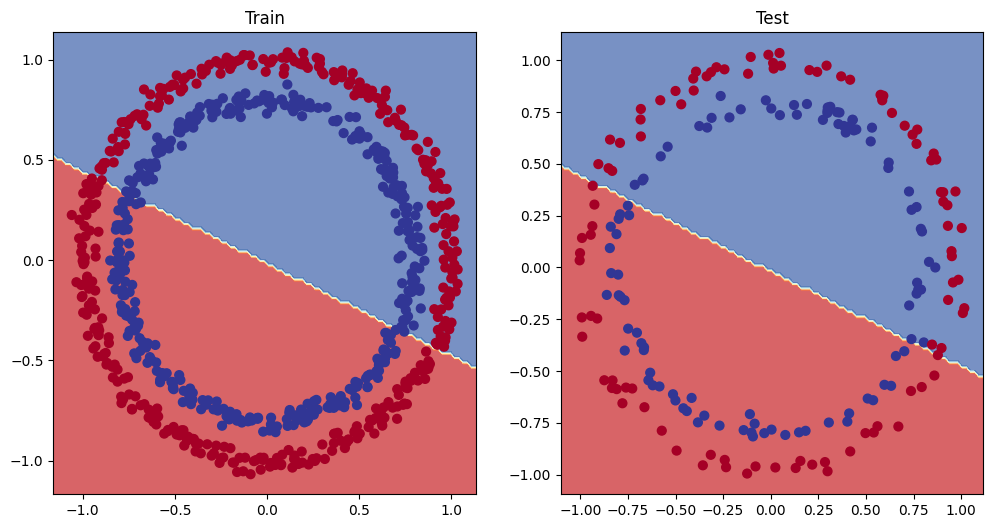

In [38]:
# Plot decision boundary of the Model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## Improving a Model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Changing the learning rate
* Changing the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters.**

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [39]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0824, -0.0082],
                      [ 0.2403, -0.6237],
                      [ 0.3473, -0.2105],
                      [-0.4309,  0.1270],
                      [-0.4007,  0.5236]])),
             ('0.bias', tensor([-0.4731, -0.6020,  0.2463,  0.5721,  0.2877])),
             ('1.weight',
              tensor([[-0.2074, -0.2184, -0.2835, -0.2470, -0.2152]])),
             ('1.bias', tensor([0.0444]))])

In [40]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self, x):
    # z=self.layer_1(x)
    # z=self.layer_2(z)
    # z=self.layer_3(z)

    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [42]:
# Create a Lossfunction
loss_fn=nn.BCEWithLogitsLoss()

# Create an optimizer function
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [43]:
# Writing a training and evaluation loop for model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Training for longer
epochs = 1000

# Put data on target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) # Logits -> Pred Probabilities -> Pred Labels

  # 2. Calculate loss/acc
  logit_loss = loss_fn(y_logits,y_train)
  acc = accuracy(y_true=y_train,
                 y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  logit_loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/acc
    test_logit_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy(y_true=y_test,
                      y_pred=test_pred)

  # Print out what's happning
  if epoch % 100 == 0 :
    print(f"Epoch : {epoch} | Train loss : {logit_loss:.5f} | Train Accuracy : {acc:.2f}% | Test loss : {test_logit_loss:.5f} | Test Accuracy : {test_acc:.2f}%")


Epoch : 0 | Train loss : 0.69396 | Train Accuracy : 50.88% | Test loss : 0.69261 | Test Accuracy : 51.00%
Epoch : 100 | Train loss : 0.69305 | Train Accuracy : 50.38% | Test loss : 0.69379 | Test Accuracy : 48.00%
Epoch : 200 | Train loss : 0.69299 | Train Accuracy : 51.12% | Test loss : 0.69437 | Test Accuracy : 46.00%
Epoch : 300 | Train loss : 0.69298 | Train Accuracy : 51.62% | Test loss : 0.69458 | Test Accuracy : 45.00%
Epoch : 400 | Train loss : 0.69298 | Train Accuracy : 51.12% | Test loss : 0.69465 | Test Accuracy : 46.00%
Epoch : 500 | Train loss : 0.69298 | Train Accuracy : 51.00% | Test loss : 0.69467 | Test Accuracy : 46.00%
Epoch : 600 | Train loss : 0.69298 | Train Accuracy : 51.00% | Test loss : 0.69468 | Test Accuracy : 46.00%
Epoch : 700 | Train loss : 0.69298 | Train Accuracy : 51.00% | Test loss : 0.69468 | Test Accuracy : 46.00%
Epoch : 800 | Train loss : 0.69298 | Train Accuracy : 51.00% | Test loss : 0.69468 | Test Accuracy : 46.00%
Epoch : 900 | Train loss : 0.6

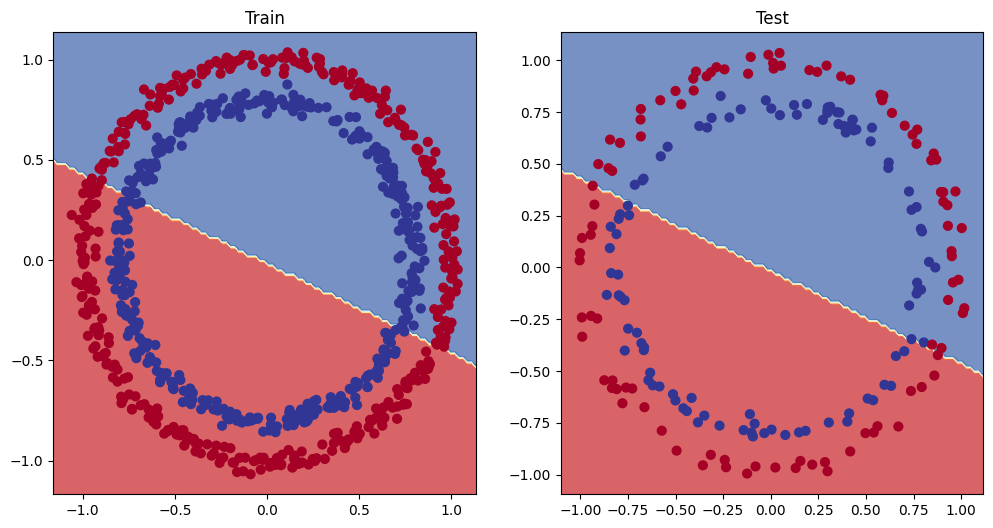

In [44]:
# Plot decision boundary of the Model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

### Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [45]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
stop = 1
step = 0.01

# Create data
X_regression=torch.arange(start,stop,step).unsqueeze(dim=1)
y_regression=weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [46]:
# Create train and test split
train_split=int(0.8 * len(X_regression))
X_train_regression , y_train_regression = X_regression[:train_split] , y_regression[:train_split]
X_test_regression , y_test_regression = X_regression[train_split:] , y_regression[train_split:]

# Check the lengths of each
len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

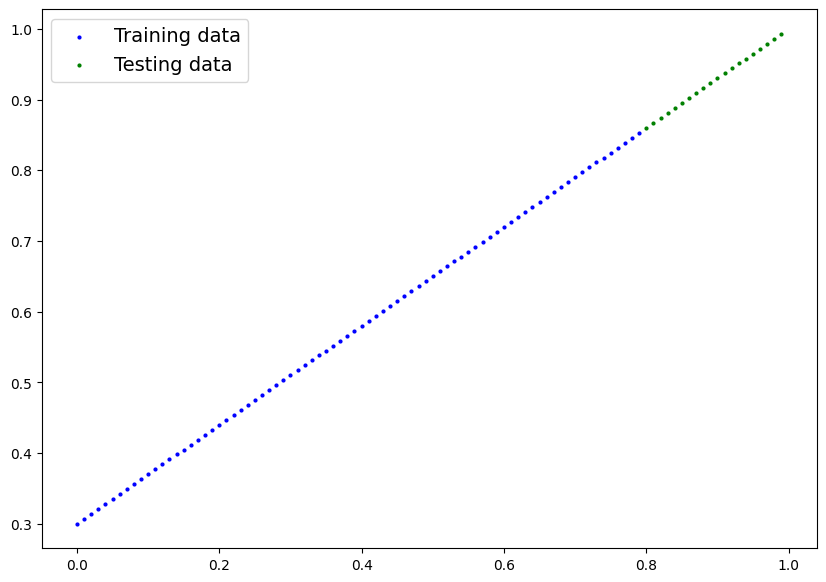

In [47]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### Adjusting `model_1` to fit the straight line

In [48]:
# Same architecture as model_1 (but using nn.Sequential())
model_2=nn.Sequential(
    nn.Linear(in_features=1 , out_features=10),
    nn.Linear(in_features=10 , out_features=10),
    nn.Linear(in_features=10 , out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
# Loss and optimizer
loss_fn = nn.L1Loss()

optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)


In [50]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs=1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

# Training
for epoch in range(epochs):
  model_2.train()
  y_pred_regression=model_2(X_train_regression)
  loss=loss_fn(y_pred_regression,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred,y_test_regression)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | loss : {loss:.5f} | test_loss : {test_loss:.5f}")

Epoch : 0 | loss : 0.75986 | test_loss : 0.54143
Epoch : 100 | loss : 0.09309 | test_loss : 0.02901
Epoch : 200 | loss : 0.07376 | test_loss : 0.02850
Epoch : 300 | loss : 0.06745 | test_loss : 0.00615
Epoch : 400 | loss : 0.06107 | test_loss : 0.02004
Epoch : 500 | loss : 0.05698 | test_loss : 0.01061
Epoch : 600 | loss : 0.04857 | test_loss : 0.01326
Epoch : 700 | loss : 0.06109 | test_loss : 0.02127
Epoch : 800 | loss : 0.05600 | test_loss : 0.01425
Epoch : 900 | loss : 0.05571 | test_loss : 0.00603


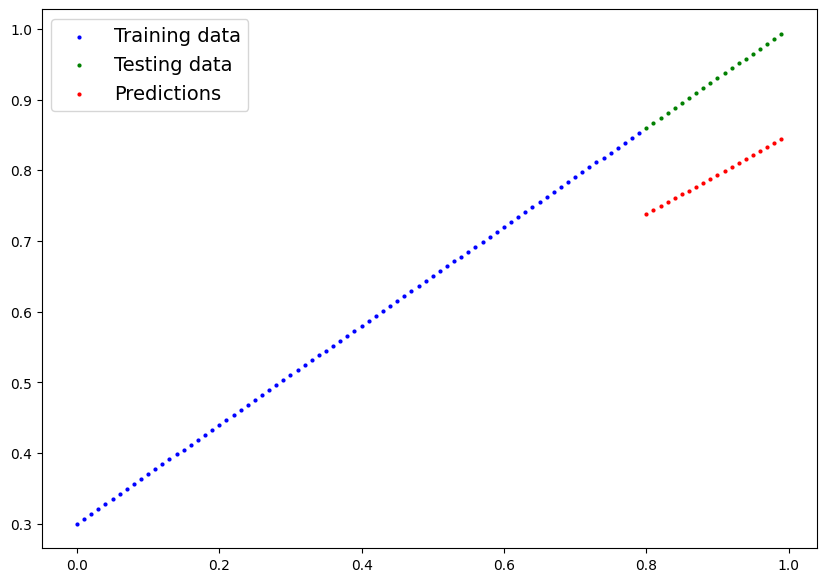

In [51]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inferences)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## The missing piece: non linearity
"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite(but really it is finite) of linear and non-linear functions?

### Recreating non linear data (red and blue circles)

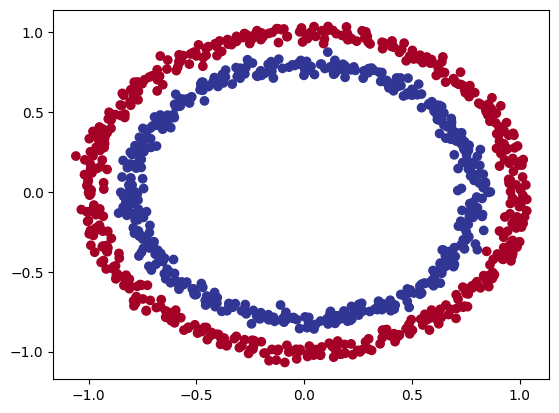

In [52]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [53]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

X_train[:5] , y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Building a model with non-linearity
* Linear = straight lines
* Non-Linear = Non straight lines

Artificial neural networks are a large combination of linear(straight) and non-straight(non-linear) functions which are potentially able to find patterns in data.

In [54]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # self.layer_1=nn.Linear(in_features=2, out_features=10)
    # self.layer_2=nn.Linear(in_features=10, out_features=10)
    # self.layer_3=nn.Linear(in_features=10, out_features=1)

    # 1. Adding another layer to improve accuracy of our model from 74% to upto 80%
    # self.layer_4=nn.Linear(in_features=10, out_features=1) --> Adding this has reduced accuracy

    # 2. Adding more hidden units to improve accuracy --> This method has improved the accuracy from 74% to 97%
    self.layer_1=nn.Linear(in_features=2, out_features=15)
    self.layer_2=nn.Linear(in_features=15, out_features=15)
    self.layer_3=nn.Linear(in_features=15, out_features=1)

    self.relu=nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
)

In [55]:
model_3.to(device)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
)

In [56]:
# Setup Loss and Optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

### Training a model with non-Linearity

In [57]:
# Random Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward Pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the Loss
  loss = loss_fn(y_logits,y_train) #BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy(y_true=y_train,
                 y_pred=y_pred)

  # 3. Optimizer Zero grad
  optimizer.zero_grad()

  # 4. Loss Backwards (Backpropagation)
  loss.backward()

  # 5. Optimizer step (Gradient Descent)
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze() # Add .squeeze() here to match the training loop
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy(y_true=y_test,
                        y_pred=test_pred)

  # Print out what's happning
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Training Loss : {loss:.4f} | Training Accuracy : {acc:.2f}% | Testing Loss : {test_loss:.4f} | Testing Accuracy : {test_acc:.2f}%")

Epoch : 0 | Training Loss : 0.6939 | Training Accuracy : 45.50% | Testing Loss : 0.6949 | Testing Accuracy : 43.50%
Epoch : 100 | Training Loss : 0.6889 | Training Accuracy : 59.38% | Testing Loss : 0.6909 | Testing Accuracy : 58.00%
Epoch : 200 | Training Loss : 0.6850 | Training Accuracy : 61.75% | Testing Loss : 0.6877 | Testing Accuracy : 56.50%
Epoch : 300 | Training Loss : 0.6797 | Training Accuracy : 63.12% | Testing Loss : 0.6838 | Testing Accuracy : 57.00%
Epoch : 400 | Training Loss : 0.6716 | Training Accuracy : 61.12% | Testing Loss : 0.6776 | Testing Accuracy : 57.00%
Epoch : 500 | Training Loss : 0.6580 | Training Accuracy : 64.38% | Testing Loss : 0.6664 | Testing Accuracy : 60.50%
Epoch : 600 | Training Loss : 0.6348 | Training Accuracy : 76.88% | Testing Loss : 0.6463 | Testing Accuracy : 70.00%
Epoch : 700 | Training Loss : 0.5915 | Training Accuracy : 93.25% | Testing Loss : 0.6076 | Testing Accuracy : 90.00%
Epoch : 800 | Training Loss : 0.5152 | Training Accuracy :

### Evaluating a model trained on non-linear activation functions

In [58]:
# Making predictions
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

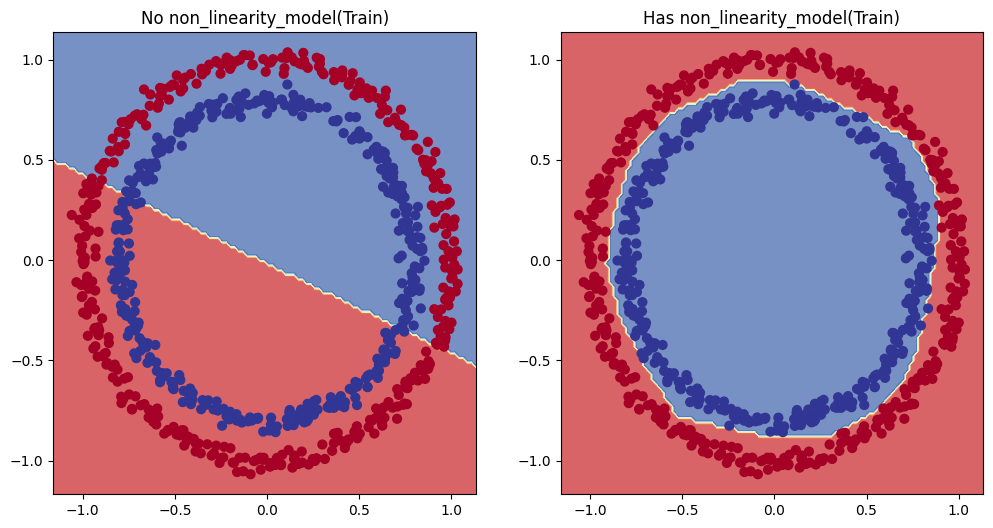

In [59]:
# Plot decision boundary(Training dataset)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("No non_linearity_model(Train)")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Has non_linearity_model(Train)")
plot_decision_boundary(model_3,X_train,y_train)


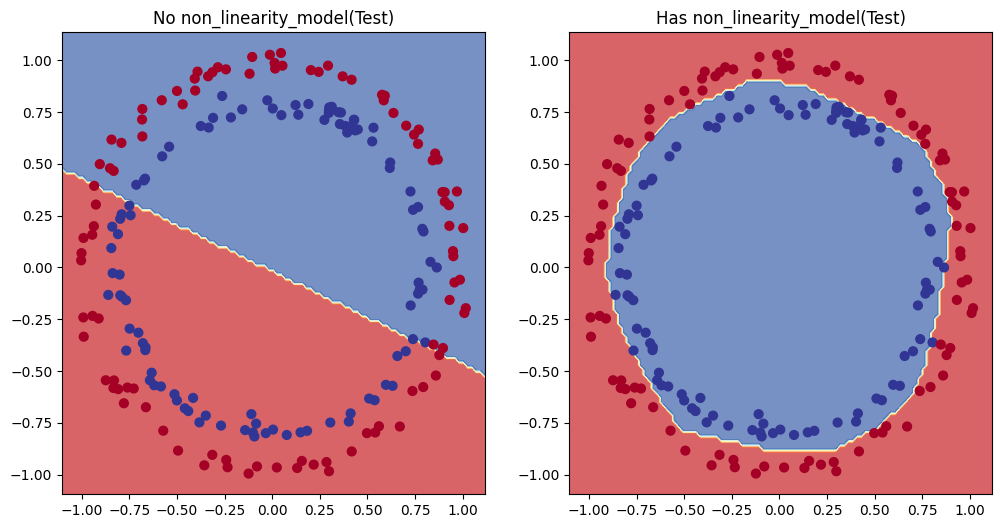

In [60]:
# Plot decision boundary(testing dataset)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("No non_linearity_model(Test)")
plot_decision_boundary(model_1,X_test,y_test)
plt.subplot(1,2,2)
plt.title("Has non_linearity_model(Test)")
plot_decision_boundary(model_3,X_test,y_test)

## Putting it all together with a multiclass classification problem

* Binary Classification = one thing or another (cat vs dog, spam or not spam, fraud or not fraud)
* Multi-Class classification = more than one thing or another (cat vs dog vs chicken)

### Creating a toy multiclass dataset

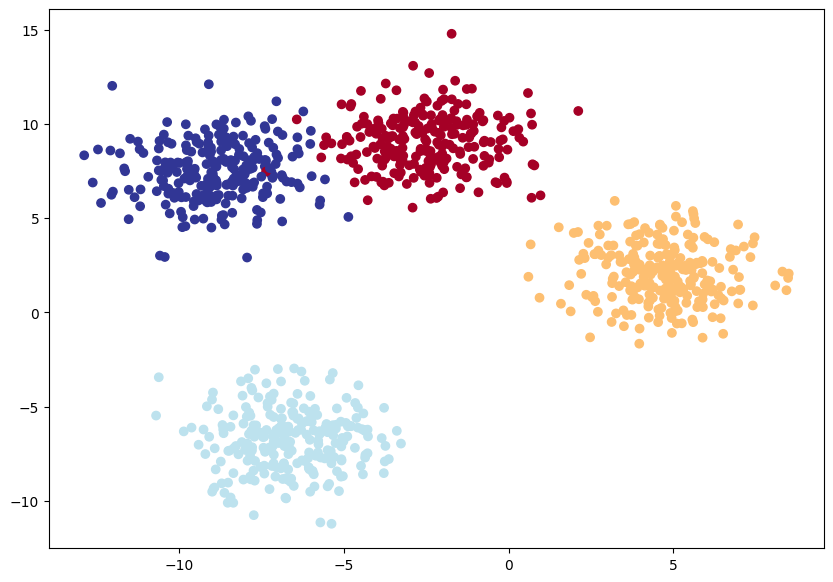

In [61]:
# Import dependicies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

# Set he hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob , y_blob =make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # this is used to bring some randomnessto the data
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train , X_blob_test , y_blob_train , y_blob_test = train_test_split(X_blob,
                                                                           y_blob,
                                                                           test_size=0.2,
                                                                           random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

### Building a Multi-Class classification Modelin Python

In [62]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [63]:
# Builda multiclass classification model
from torch import nn

class BlobModel(nn.Module):
  def __init__(self,input_features, output_features, hidden_units=8):
    """ Initializes multi-class classification model.
    Args:
      input_features  (int) : Number of input features to the model.
      output_features (int) : Number of output features to the model.
      hidden_units    (int) : Number of hidden units between layers, default 8

    Returns :

    Example :

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x : torch.tensor):
    return self.linear_layer_stack(x)

# Create an instance of Blob Model and send it to target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [64]:
X_blob_train.shape,y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [65]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### Create a loss function and an Optimizer for multi-class classification model

In [66]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning rate is a hyperparameter you can change



### Getting Prediction Probabilities for a multi-class classification problem

In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to prediction probabilities and then to prediction labels.

Logits (raw output's of the model) -> Pred Prob (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)



In [67]:
X_blob_test.device

device(type='cpu')

In [68]:
# Putting the data over our device
X_blob_train , X_blob_test = X_blob_train.to(device) , X_blob_test.to(device)
y_blob_train , y_blob_test = y_blob_train.to(device) , y_blob_test.to(device)

model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test)
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [69]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [70]:
# Convert our model'sLogits outputs to prediction probabilities
y_pred_proba = torch.softmax(y_logits , dim=1)
print(y_logits[:5])
print(y_pred_proba[:5]) # This is giving us the probabilities of our data points to be from class 0,1,2,3
                        # i.e. the value at 0th index gives us the probability of that data point to belong
                        # to class 0 . Similarly the value at 1st index gives us the probability of that data
                        # point to belong to class 1 . Similarly for class 2 and 3 as well.

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [71]:
# We need the max probability of a data point to belog to a particular class
# That's why we are using argmax() which givesus the index of that max prob.

y_preds = torch.argmax(y_pred_proba , dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [72]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### Creating a training loop and a testing loop for a multi-class pytorch model

In [73]:
model_4.to(device)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  ### Training
  model_4.train()
  # 1. Forward Pass
  y_train_logits = model_4(X_blob_train).squeeze()
  y_train_proba = torch.argmax(torch.softmax(y_train_logits , dim=1) , dim=1)

  # 2. Calculate the loss
  train_loss = loss_fn(y_train_logits,y_blob_train)
  train_acc = accuracy(y_true=y_blob_train,
                       y_pred=y_train_proba)

  # 3. Optimizer
  optimizer.zero_grad()

  # 4. Loss backwards (Backpropagation)
  train_loss.backward()

  # 5. Optimizer step (Gradient Descent)
  optimizer.step()

  ###Testing
  model_4.eval()
  with torch.inference_mode():
    y_test_logits = model_4(X_blob_test).squeeze()
    y_test_proba = torch.argmax(torch.softmax(y_test_logits , dim=1) , dim=1)

    test_loss = loss_fn(y_test_logits , y_blob_test)
    test_acc = accuracy(y_true=y_blob_test,
                        y_pred=y_test_proba)
  # Print out what's happning
  if epoch % 100 == 0 :
    print(f"Epoch : {epoch} | Training loss : {train_loss:.4f} | Training Accuracy : {train_acc:.2f}% | Testing loss : {test_loss:.4f} | Testing Accuracy : {test_acc:.2f}%")


Epoch : 0 | Training loss : 1.1588 | Training Accuracy : 40.38% | Testing loss : 1.0755 | Testing Accuracy : 48.00%
Epoch : 100 | Training loss : 0.0331 | Training Accuracy : 99.25% | Testing loss : 0.0243 | Testing Accuracy : 99.50%
Epoch : 200 | Training loss : 0.0266 | Training Accuracy : 99.25% | Testing loss : 0.0165 | Testing Accuracy : 99.50%
Epoch : 300 | Training loss : 0.0250 | Training Accuracy : 99.25% | Testing loss : 0.0144 | Testing Accuracy : 99.50%
Epoch : 400 | Training loss : 0.0243 | Training Accuracy : 99.25% | Testing loss : 0.0134 | Testing Accuracy : 99.50%
Epoch : 500 | Training loss : 0.0238 | Training Accuracy : 99.25% | Testing loss : 0.0127 | Testing Accuracy : 99.50%
Epoch : 600 | Training loss : 0.0234 | Training Accuracy : 99.25% | Testing loss : 0.0122 | Testing Accuracy : 99.50%
Epoch : 700 | Training loss : 0.0231 | Training Accuracy : 99.25% | Testing loss : 0.0118 | Testing Accuracy : 99.50%
Epoch : 800 | Training loss : 0.0228 | Training Accuracy :

In [74]:
model_4.eval()
with torch.inference_mode():
  y_preds=torch.softmax(model_4(X_blob_test),dim=1).argmax(dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [75]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

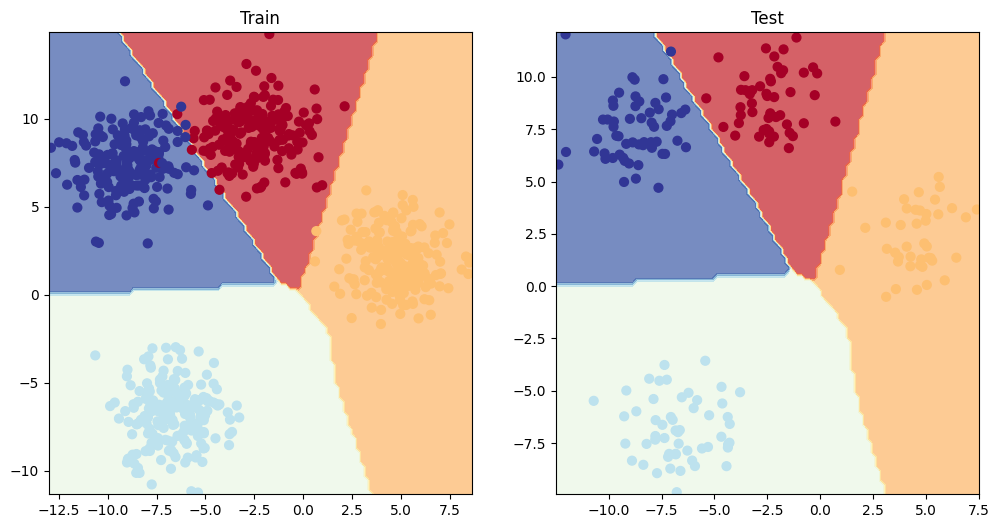

In [76]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,
                       X_blob_train,
                       y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,
                       X_blob_test,
                       y_blob_test)

## A few more classification metrics ...(to evaluate our classification model)

* Accuracy -> out of 100 samples, how many does our model get right.
* Precision -> Higher Precision leads to less False Positives. (Precision = TP / (TP + FP))
* Recall -> Higher recall leads to less False Negatives. (Recall = TP / (TP + FN))
* F1-score -> Harmonic mean of precision and recall. (F1-score = 2*(Precision*Recall) / (Precision + Recall))
* Confusion matrix
* Classification report

See this article for when to use precision and recall -->
https://towardsdatascience.com/beyond-accuracy-other-classification-metrics-you-should-know-in-machine-learning-ea671be83bb7/

In [77]:
%pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 9.0 MB/s eta 0:00:00


In [82]:
from torchmetrics import Accuracy

# Setup metric
torchmetrics_accuracy = Accuracy(task="multiclass" , num_classes=NUM_CLASSES).to(device)

# Calculate Accuracy
torchmetrics_accuracy(y_preds,y_blob_test)

tensor(0.9950)